# Library

In [1]:
import rospy
import jupyros as jr 
import ipywidgets as widgets
import sys
import matplotlib.pyplot as plt                                                                     
import numpy as np
from std_srvs.srv import *                                                       
from std_msgs.msg import String                                                   
from ipywidgets import Button, Output, Layout, ButtonStyle, GridBox, VBox, HBox  
from IPython.display import display                                              
from jupyros import ros3d                                                        
import os                                                                       
from nav_msgs.msg import Odometry                                                
from ipywidgets import interactive_output
from geometry_msgs.msg import Twist
from sensor_msgs.msg import LaserScan
from actionlib_msgs.msg import GoalStatusArray
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import MaxNLocator
import tf
from tf.transformations import quaternion_matrix

# ros node initiation

In [2]:
rospy.init_node('jupyter_node')                                                

# Robot Behaivore 

In [3]:
#Widget to choose robot behavior
RB = widgets.RadioButtons(
    options=['1.Entere coordinates','2.Driving with keyboards',
             '3.Driving & avoid obstacles' ],
#    value='Entere coordinates', # Defaults to 'Entere coordinates'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Choose robot behavior:',
    disabled=False
)
display(RB)

RadioButtons(description='Choose robot behavior:', options=('1.Entere coordinates', '2.Driving with keyboards'…

# Change State of Robot

In [4]:
#Use set_param to change state of robot
if RB.value == '1.Entere coordinates':
    rospy.set_param('robot_state', '1')
elif RB.value == '2.Driving with keyboards':
    rospy.set_param('robot_state', '2')
elif RB.value == '3.Driving & avoid obstacles':
    rospy.set_param('robot_state', '3')
print("robot behaviour changed to: ")
print(RB.value)

robot behaviour changed to: 
1.Entere coordinates


# Insert Goal 

In [5]:
#jupyter ros to publish goal insert by user
print("Insert coordinate in format x,y:\n")
jr.publish('/movebase_client_goal', String)

Insert coordinate in format x,y:



# Stop Button

In [7]:
def update(self, x, y, z, th, speed, turn):
    self.condition.acquire()
    self.x = x
    self.y = y
    self.z = z
    self.th = th
    self.speed = speed
    self.turn = turn

def stop(self):
    self.done = True
    self.update(0, 0, 0, 0, 0, 0)
    self.join()

stop_button = Button(
    description='Stop',
    disabled=False,
    button_style='danger',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Stop Simulation',
    icon='stop',  # (FontAwesome names without the `fa-` prefix)
    layout=Layout(width='50%', height='80px')
    )
jr.publish('/cmd_vel', Twist, stop)
#rospy.Subscriber('cmd_vel', Twist, queue_size = 1)
HBox([stop_button])
    

# Driving with keyboards

In [10]:
#Define different keys to guide robots
in1 = Button(description='u',layout=Layout(width='auto', grid_area='in1'),style=ButtonStyle(button_color='olive'))
out1 = Output()
in2 = Button(description='j',layout=Layout(width='auto', grid_area='in2'),style=ButtonStyle(button_color='olive'))
out2 = Output()
in3 = Button(description='m',layout=Layout(width='auto', grid_area='in3'),style=ButtonStyle(button_color='olive'))
out3 = Output()
in4 = Button(description='i',layout=Layout(width='auto', grid_area='in4'),style=ButtonStyle(button_color='olive'))
out4 = Output()
in5 = Button(description='k',layout=Layout(width='auto', grid_area='in5'),style=ButtonStyle(button_color='olive'))
out5 = Output()
in6 = Button(description=',',layout=Layout(width='auto', grid_area='in6'),style=ButtonStyle(button_color='olive'))
out6 = Output()
in7 = Button(description='o',layout=Layout(width='auto', grid_area='in7'),style=ButtonStyle(button_color='olive'))
out7 = Output()
in8 = Button(description='l',layout=Layout(width='auto', grid_area='in8'),style=ButtonStyle(button_color='olive'))
out8 = Output()
in9 = Button(description='.',layout=Layout(width='auto', grid_area='in9'),style=ButtonStyle(button_color='olive'))
out9 = Output()

def on_button_clicked1(in1):
    with out1:
        pub.publish('u')
def on_button_clicked2(in2):
    with out2:
        pub.publish('j')
def on_button_clicked3(in3):
    with out3:
        pub.publish('m')
def on_button_clicked4(in4):
    with out4:
        pub.publish('i')
def on_button_clicked5(in5):
    with out5:
        pub.publish('k')
def on_button_clicked6(in6):
    with out6:
        pub.publish(',')
def on_button_clicked7(in7):
    with out7:
        pub.publish('o')
def on_button_clicked8(in8):
    with out8:
        pub.publish('l')
def on_button_clicked9(in9):
    with out9:
        pub.publish('.')
        
in1.on_click(on_button_clicked1)
in2.on_click(on_button_clicked2)
in3.on_click(on_button_clicked3)
in4.on_click(on_button_clicked4)
in5.on_click(on_button_clicked5)
in6.on_click(on_button_clicked6)
in7.on_click(on_button_clicked7)
in8.on_click(on_button_clicked8)
in9.on_click(on_button_clicked9)

pub = rospy.Publisher('/teleop_input_key', String, queue_size=10)
print("input direction:")
HBox([VBox([in1, in2, in3]),VBox([in4, in5, in6]),VBox([in7, in8, in9])])


input direction:


# Control Velocity


In [11]:
#jupyter ros to publish velocity choose by user
jr.publish('/cmd_vel', Twist)

# 3D Viwer

In [12]:
#Environment similar to Rviz to view robot status
v = ros3d.Viewer()
rc = ros3d.ROSConnection(url="ws://localhost:9090")
tf_client = ros3d.TFClient(ros=rc, fixed_frame='map')
laser_view = ros3d.LaserScan(topic="/scan", ros=rc, tf_client=tf_client)
map_view = ros3d.OccupancyGrid(topic="/map", ros=rc, tf_client=tf_client)
path = ros3d.Path(topic="/move_base/NavfnROS/plan", ros=rc,
tf_client=tf_client)
urdf = ros3d.URDFModel(ros=rc, tf_client=tf_client,
path=os.environ.get('JUPYROS_ASSETS_URL', 'http://localhost:3000'))
g = ros3d.GridModel()
v.objects = [g, laser_view, map_view, path, urdf]
v

Viewer(objects=[GridModel(), LaserScan(ros=ROSConnection(url='ws://localhost:9090'), tf_client=TFClient(fixed_…

# Lascer Range

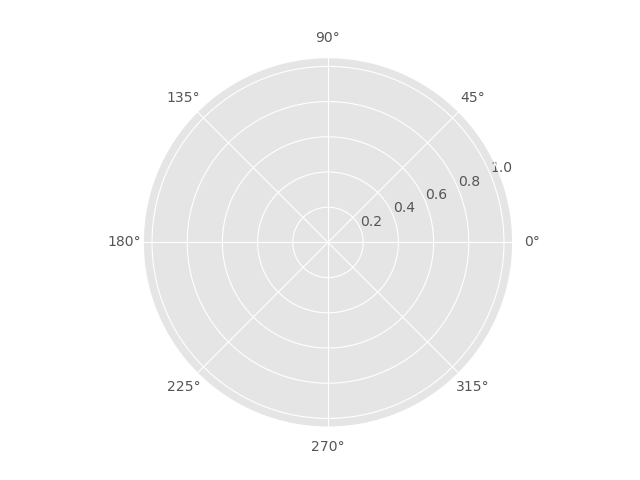

Text(0.5, 1.05, 'Laser_scaner')

In [15]:
%matplotlib widget
rmax = 0   # Radius of the laser scanner plot.     
plt.style.use('ggplot')

class Visualiser:
    
    def __init__(self):
        self.fig, self.ax = plt.subplots(subplot_kw={'projection': 'polar'})
        self.ln, = plt.plot([], [], 'g')
        self.x_data, self.y_data = [] , []
#Plot instraction  
    def plot_init(self):
        self.ax.set_xlim(rmax)
        self.ax.set_ylim(-np.pi/2, np.pi/2)
        return self.ln
# Subscribe to scan topic     
    def clbk_laser(self, msg):
        self.x_data.append(msg.ranges)
        self.y_data.append(np.arange(msg.angle_min, msg.angle_max+msg.angle_increment, msg.angle_increment))
#Update Laser scaner radar 
    def update_plot(self, frame):
        self.ln.set_data(self.x_data, self.y_data)
        return self.ln
    
vis = Visualiser()
sub_laser = rospy.Subscriber('/scan', LaserScan, vis.clbk_laser)
ani = FuncAnimation(vis.fig, vis.update_plot, init_func=vis.plot_init,blit=True)
plt.show(block=True)
plt.title("Laser_scaner")


# 2D plot patch follow

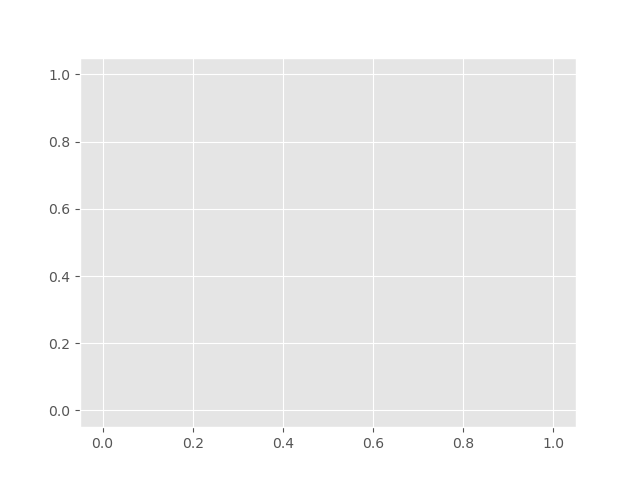

Text(0.5, 1, 'Odometry')

In [14]:
#Define primary instruction to print 2D robot stroke
%matplotlib widget
plt.style.use('ggplot')

class Visualiser:
    
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.ln, = plt.plot([], [], 'r')
        self.x_data, self.y_data = [] , []
#Plot instraction 
    def plot_init(self):
        self.ax.set_xlim(-10, 10)
        self.ax.set_ylim(-10, 10)
        return self.ln
#Subscribe to omdometry topic 
    def odom_callback(self, msg):
        self.y_data.append(msg.pose.pose.position.y)
        self.x_data.append(msg.pose.pose.position.x)
#Update path follow of robot
    def update_plot(self, frame):
        self.ln.set_data(self.x_data, self.y_data)
        return self.ln
vis = Visualiser()
sub = rospy.Subscriber('/odom', Odometry, vis.odom_callback)
ani = FuncAnimation(vis.fig, vis.update_plot, init_func=vis.plot_init,blit=True)
plt.show(block=True)
plt.title("Odometry")